# bpm thing!


# imports

In [ ]:
pip install lyricsgenius

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.6 MB/s 


In [1]:
# libary imports, include all libaries needed to run the file here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

#for apis
import requests
import json
#import lyricsgenius

#for regex lyric cleaning
import re

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Spotify

In [2]:
#spotify keys
spotify_client_id = '9bf2211d3826492aa72471ec394689e1'
spotify_client_secret = '8e28cf71dcc5438eb06e5da566a3ec28'

In [3]:
#spotify connection

AUTH_URL = 'https://accounts.spotify.com/api/token'

auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': spotify_client_id,
    'client_secret': spotify_client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

In [ ]:
playlist_id = '43HVYOupFWCPyWopTpID0j'
data = []
song_dict = {}

playlist_request = requests.get(BASE_URL + 'playlists/' + playlist_id + '/tracks', 
                 headers=headers)
playlist_json = playlist_request.json()

for i in range(len(playlist_json['items'])):

  track_name = playlist_json['items'][i]['track']['name']
  pattern_1= r'\(.*?\)'
  track_name = re.sub(pattern_1, '', track_name)

  song_dict['track'] = track_name

  artists = ''
  for j in range(len(playlist_json['items'][i]['track']['artists'])):

    if j > 0:
      artists += (', ')
    artists += (playlist_json['items'][i]['track']['artists'][j]['name'])

  song_dict['artist'] = artists
  data.append(song_dict.copy())

df = pd.DataFrame(data)

In [ ]:
df

,track,artist
0,me,"Taylor Morgan, tana, kuru"
1,MANIAC,DC The Don
2,Wasting Your Time,d4vd
3,No Names,Scorey
4,Treat You The Best,Deric
...,...,...
92,Legend,"Lil Spooki, Stunna Gambino, Scorey"
93,You & Me,Tommy Ice
94,tylenol,jaydes
95,Destroyed,Tom The Mail Man


# genius

In [ ]:
genius_access_token = "MyxKBLahqk0o62eDaGh_ZxSVcqCi_sd_cPZVVL9h_BOCCI8x7DxqU1ve4UHPyOyd"
genius = lyricsgenius.Genius(genius_access_token,timeout=15, retries=3 )

def get_lyrics(df_track_artist):
  # This function pulls lyrics for each unique song in a list of tracks
  # start timer
  start = time.perf_counter()
  # making empty dataframe to store artist song data
  song_df = pd.DataFrame()
  #lists to make dataframe consisting of title, lyrics and id
  artists = []
  titles = []
  lyrics = []

  # looping through song data 
  for idx in df_track_artist.index:
    track = df_track_artist['track'][idx]
    artist = df_track_artist['artist'][idx]

    #####STUPID WORKAROUND
    if track == "More Love Songs 4 U That Still Sound Sad":
      track = "More Love Songs 4 you That Still Sound Sad"
    
    print('Track:', track)
    song = genius.search_song(track, artist)
    try: # try to find song
      titles.append(str(song.title))
      lyrics.append(song.lyrics)
      artists.append(str(song.artist))
      print('Found', song.title, 'by artist:', song.artist)
    except: # if song cannot be found, skip to next 
      titles.append('err not found')
      artists.append('err not found')
      lyrics.append('err not found')
      continue
  # storing song data in dataframe
  song_df['artist'] = artists
  song_df['track'] = titles
  song_df['lyrics'] = lyrics

  # end timer
  end = time.perf_counter()
  print('Elapsed Time: ', end-start)
  return song_df

In [ ]:
song_lyrics=get_lyrics(df)

Track: me
Searching for "me" by Taylor Morgan, tana, kuru...
Done.
Found ‎me by artist: Taylor Morgan
Track: MANIAC
Searching for "MANIAC" by DC The Don...
Done.
Found MANIAC by artist: DC The Don
Track: Wasting Your Time
Searching for "Wasting Your Time" by d4vd...
Done.
Found Wasting Your Time by artist: D4vd
Track: No Names
Searching for "No Names" by Scorey...
Done.
Found No Names by artist: Scorey
Track: Treat You The Best
Searching for "Treat You The Best" by Deric...
Done.
Found Treat You The Best by artist: Deric (ATL)
Track: NOT SOBER 
Searching for "NOT SOBER " by The Kid LAROI, Polo G, Stunna Gambino...
Done.
Found NOT SOBER by artist: The Kid LAROI
Track: Peach Dream
Searching for "Peach Dream" by LUCKI...
Done.
Found Peach Dream by artist: LUCKI
Track: Blind Spots
Searching for "Blind Spots" by 440 Smitty...
Done.
Found Blind Spots by artist: 440 Smitty
Track: Caught Up
Searching for "Caught Up" by 350heem...
Done.
Found Caught Up by artist: 350Heem
Track: In My Head
Searc

In [ ]:
song_lyrics

,artist,track,lyrics
0,Taylor Morgan,‎me,‎me Lyrics[Chorus: BabySantana]\nEvil creeping...
1,DC The Don,MANIAC,MANIAC Lyrics[Chorus]\nGoin' and goin' and goi...
2,D4vd,Wasting Your Time,Wasting Your Time Lyrics[Pre-Chorus]\nI just d...
3,Scorey,No Names,No Names Lyrics[Intro]\nWe were already checki...
4,Deric (ATL),Treat You The Best,"Treat You The Best LyricsUh-huh, huh, ha\n(Oli..."
...,...,...,...
92,Lil Spooki,Legend,Legend Lyrics[Intro: Stunna Gambino]\nRockstar...
93,Tommy Ice,You & Me,You & Me Lyrics[Intro]\nYeah (Yeah)\nAyy (Ayy)...
94,​jaydes,‎tylenol,"‎tylenol Lyrics[Intro]\nHey, hey, hey\nYou hav..."
95,Tom The Mail Man,Destroyed,Destroyed Lyrics[Intro]\nYou take my friends a...


In [ ]:
df = df.replace("`|’", "'", regex=True)
song_lyrics = song_lyrics.replace("`|’", "'", regex=True)

In [ ]:
toDrop = []
for i in range(len(song_lyrics)):
  target = song_lyrics.iloc[i].track.replace(u'\u200e', '')
  target = target.replace(u'\u200b','')
  reference = df.iloc[i].track.strip()
  if ((target.lower() != reference.lower()) and (target.lower() != "more love songs 4 you that still sound sad") and (target.lower() != "mr. brightside")):
    print('dropping ', df.iloc[i].track)
    toDrop.append(i)

correct_lyrics = song_lyrics
for i in toDrop:
  correct_lyrics.drop(i, inplace= True)

dropping  Good Game
dropping  a lie
dropping  OH YEAH!
dropping  2 Far Gone
dropping  i don't need u
dropping  Honest
dropping  toxic
dropping  Swerving
dropping  Die Young
dropping  Too Young?


In [ ]:
correct_lyrics

,artist,track,lyrics
0,Taylor Morgan,‎me,‎me Lyrics[Chorus: BabySantana]\nEvil creeping...
1,DC The Don,MANIAC,MANIAC Lyrics[Chorus]\nGoin' and goin' and goi...
2,D4vd,Wasting Your Time,Wasting Your Time Lyrics[Pre-Chorus]\nI just d...
3,Scorey,No Names,No Names Lyrics[Intro]\nWe were already checki...
4,Deric (ATL),Treat You The Best,"Treat You The Best LyricsUh-huh, huh, ha\n(Oli..."
...,...,...,...
91,Rich Amiri,Number 2,"Number 2 Lyrics[Intro]\nX8\nYeah, yeah\nYeah, ..."
92,Lil Spooki,Legend,Legend Lyrics[Intro: Stunna Gambino]\nRockstar...
93,Tommy Ice,You & Me,You & Me Lyrics[Intro]\nYeah (Yeah)\nAyy (Ayy)...
94,​jaydes,‎tylenol,"‎tylenol Lyrics[Intro]\nHey, hey, hey\nYou hav..."


In [ ]:
len(correct_lyrics)

87

In [ ]:
def clean_lyrics(df_song_lyrics):
  for index in range(df_song_lyrics['track'].shape[0]):
    #removing anything in [] 
    pattern_1= r'\[.*?\]'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_1, ' ', df_song_lyrics.iloc[index, 2])
    
    #removing \dEmbedShare URLCopyEmbedCopy 
    pattern_1= r'[\d-]EmbedShare URLCopyEmbedCopy'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_1, ' ', df_song_lyrics.iloc[index, 2])
    
    #removing \d\dEmbedShare URLCopyEmbedCopy 
    pattern_2= r'[\d-][\d-]EmbedShare URLCopyEmbedCopy'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_2, ' ', df_song_lyrics.iloc[index, 2])
    
    #removing EmbedShare URLCopyEmbedCopy 
    pattern_3= r'EmbedShare URLCopyEmbedCopy'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_3, ' ', df_song_lyrics.iloc[index, 2])

    pattern_4= r'Embed'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_4, ' ', df_song_lyrics.iloc[index, 2])

    #removing anything in () 
    pattern_5= r'\(.*?\)'
    df_song_lyrics.iloc[index, 2] = re.sub(pattern_5, ' ', df_song_lyrics.iloc[index, 2])

    df_song_lyrics.iloc[index, 2] = re.sub("\d+", " ", df_song_lyrics.iloc[index, 2])

    start_string = str(df_song_lyrics.iloc[index, 1]) + " Lyrics \\n"
    
    df_song_lyrics['lyrics'].replace(start_string,'', regex=True, inplace=True)
  
  
  return df_song_lyrics

final_lyrics = clean_lyrics(correct_lyrics)

In [ ]:
entire = ''
for i in final_lyrics['lyrics']:
  entire += i
  entire += '\n'

entire = entire.replace(u'\u200b', " ")
entire = entire.replace(u"\u2005", " ")

In [ ]:
entire

'Evil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\n\n \nYou watched my heart disappear in the dark\nWhy you acting dumb when you told me you was smart?\nWhen I look at you, you look like a work of art\n \nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remеmber when you said, "Just stay besidе me"\nDiamonds on my neck and she said "It\'s so shiny"\nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\n\n \nIt\'s not looking good\n\n \nThis shit is just the usual\nDifferent things creeping up behind me\nAnd I don\'t know you at all\nSo please ju

In [ ]:
text_file = open("full_lyrics_aug2.txt", "w")
n = text_file.write(entire)
text_file.close()

# Model

In [ ]:
with open('full_lyrics_aug2.txt', 'r') as file:
    entire = file.read()

In [ ]:
entire

'Evil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\n\n \nYou watched my heart disappear in the dark\nWhy you acting dumb when you told me you was smart?\nWhen I look at you, you look like a work of art\n \nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remеmber when you said, "Just stay besidе me"\nDiamonds on my neck and she said "It\'s so shiny"\nEvil creeping up behind me\nI don\'t know your name so can you remind me?\nI remember when you said, "Just stay beside me"\nDiamonds on my neck and she said "It\'s so shiny"\n\n \nIt\'s not looking good\n\n \nThis shit is just the usual\nDifferent things creeping up behind me\nAnd I don\'t know you at all\nSo please ju

In [ ]:
tokenizer = Tokenizer()

corpus = entire.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'you': 2, 'the': 3, 'my': 4, 'a': 5, 'me': 6, "i'm": 7, 'on': 8, 'that': 9, 'and': 10, 'it': 11, 'to': 12, 'in': 13, 'up': 14, 'yeah': 15, "don't": 16, 'like': 17, 'with': 18, 'know': 19, 'we': 20, 'they': 21, 'no': 22, 'for': 23, "ain't": 24, 'got': 25, 'this': 26, 'nigga': 27, 'all': 28, 'but': 29, 'just': 30, 'fuck': 31, 'she': 32, 'of': 33, 'get': 34, 'shit': 35, 'out': 36, 'be': 37, 'your': 38, 'so': 39, 'bitch': 40, 'he': 41, 'these': 42, 'niggas': 43, 'ayy': 44, 'when': 45, 'now': 46, 'do': 47, "it's": 48, "gon'": 49, 'what': 50, "can't": 51, 'love': 52, 'go': 53, 'was': 54, 'if': 55, 'can': 56, 'feel': 57, 'wanna': 58, 'want': 59, 'been': 60, 'see': 61, 'is': 62, 'right': 63, 'tryna': 64, 'not': 65, 'down': 66, 'take': 67, "'cause": 68, 'say': 69, 'never': 70, 'said': 71, 'why': 72, 'baby': 73, 'heart': 74, 'need': 75, 'them': 76, 'one': 77, 'gotta': 78, 'uh': 79, "that's": 80, 'her': 81, 'hit': 82, 'too': 83, 'some': 84, 'make': 85, 'back': 86, 'think': 87, 'oh': 88, 

In [ ]:
tokenizer.word_index.pop('yeah')
tokenizer.word_index.pop('yo')
tokenizer.word_index.pop('ay')
tokenizer.word_index.pop('ayy')

44

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
max_sequence_len

47

In [ ]:
total_words

2977

In [ ]:
import os

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_saves/model-{epoch:04d}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1)

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')


# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

history = model.fit(xs, ys, epochs=50, verbose=1, callbacks=[cp_callback])

#print model.summary()
print(model)

Epoch 1/50
968/968 [==============================] - ETA: 0s - loss: 5.6235 - accuracy: 0.0921
Epoch 1: saving model to training_saves/model-0001.h5
968/968 [==============================] - 138s 138ms/step - loss: 5.6235 - accuracy: 0.0921
Epoch 2/50
968/968 [==============================] - ETA: 0s - loss: 4.2995 - accuracy: 0.2247
Epoch 2: saving model to training_saves/model-0002.h5
968/968 [==============================] - 135s 140ms/step - loss: 4.2995 - accuracy: 0.2247
Epoch 3/50
968/968 [==============================] - ETA: 0s - loss: 3.4828 - accuracy: 0.3107
Epoch 3: saving model to training_saves/model-0003.h5
968/968 [==============================] - 136s 141ms/step - loss: 3.4828 - accuracy: 0.3107
Epoch 4/50
968/968 [==============================] - ETA: 0s - loss: 2.9428 - accuracy: 0.3770
Epoch 4: saving model to training_saves/model-0004.h5
968/968 [==============================] - 135s 139ms/step - loss: 2.9428 - accuracy: 0.3770
Epoch 5/50
968/968 [========

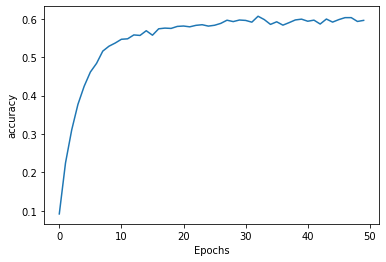

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
import textwrap

In [ ]:
seed_text = "never thought that she would get down with somebody i know"
next_words = 80
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(textwrap.fill(seed_text, 40))

NameError: ignored

In [ ]:
token_list

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1, 380,   3, 820]], dtype=int32)

In [ ]:
predicted = np.argmax(savedModel.predict([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   70,  282,    9,   32,  199,   34,   66,   18, 1028,
           1,   19]]))
output_word = ""
for word, index in tokenizer.word_index.items():
  if index == predicted:
    output_word = word
    break
print(output_word)

1/1 [==============================] - 0s 64ms/step
that


In [ ]:
# save model
model.save('trainedModel_80songs.h5')
print('Model Saved!')
 
# load model
#savedModel=load_model('trainedModel.h5')

Model Saved!


# Load Model

In [ ]:
model_reloaded = Sequential()
model_reloaded.add(Embedding(2977, 100, input_length=46))
model_reloaded.add(Bidirectional(LSTM(150)))
model_reloaded.add(Dense(2977, activation='softmax'))
adam = Adam(learning_rate=0.01)
model_reloaded.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

best = '/content/model-0033.h5'
model_reloaded.load_weights(best)

In [ ]:
import json
tokenizer.word_index
with open('data.json', 'w') as fp:
    json.dump(tokenizer.word_index, fp)

In [ ]:
seed_text = "i watch the moon"
next_words = 1
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

	predicted = np.argmax(model_load.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(textwrap.fill(seed_text, 40))

NameError: ignored

In [ ]:
model_load.save('bestModel_80songs.h5')
print('Model Saved!')


Model Saved!


In [ ]:
savedModel=load_model('bestModel_80songs.h5')

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |████████████████████████████████| 1.0 MB 11.7 MB/s 
     |████████████████████████████████| 511.7 MB 5.3 kB/s 
     |████████████████████████████████| 5.8 MB 40.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.6 kB/s 
     |████████████████████████████████| 1.6 MB 48.8 MB/s 
     |████████████████████████████████| 438 kB 51.1 MB/s 
     |████████████████████████████████| 5.8 MB 27.0 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempti

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(savedModel, '/content/')

In [ ]:
model_reloaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 46, 100)           297700    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2977)              896077    
                                                                 
Total params: 1,494,977
Trainable params: 1,494,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in model_reloaded.layers:
    print(layer.weights)

[<tf.Variable 'embedding/embeddings:0' shape=(2977, 100) dtype=float32, numpy=
array([[ 0.16644143, -0.6425742 ,  2.2014687 , ..., -0.84423625,
        -0.12515299, -2.6657958 ],
       [ 0.5907865 , -0.38605788,  0.8092115 , ..., -0.43731955,
         0.98064685,  0.8032678 ],
       [ 0.5680258 ,  0.48769808,  0.0758049 , ...,  0.15196225,
        -0.9792105 , -0.439829  ],
       ...,
       [ 1.5348883 ,  1.0594397 ,  0.49852237, ..., -1.3467875 ,
        -1.0757625 ,  3.280349  ],
       [ 0.8405491 , -0.732143  ,  0.13174684, ..., -0.04447252,
        -0.78503305,  2.42729   ],
       [-2.7194033 , -1.8303788 , -1.5811734 , ...,  0.68033576,
        -3.400772  , -1.0494442 ]], dtype=float32)>]
[<tf.Variable 'bidirectional/forward_lstm/lstm_cell_1/kernel:0' shape=(100, 600) dtype=float32, numpy=
array([[-2.3066666 , -0.01598552, -0.44614992, ...,  1.0556388 ,
        -0.68398285,  0.26315   ],
       [-2.9167929 ,  0.44690526,  1.8690825 , ...,  0.29318082,
         1.9492291 , -0

In [ ]:
tf.keras.backend.clear_session()  # this resets the session containing the stale, not-best version of the model 
model_2 = load_model("/content/bestModel_80songs.h5")
tfjs.converters.save_keras_model(model_2, '/content/');

In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 46, 100)           297700    
                                                                 
 bidirectional_3 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 2977)              896077    
                                                                 
Total params: 1,494,977
Trainable params: 1,494,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import files

In [ ]:
files.download('/content/group1-shard2of2.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>